In [1]:
#Importing Required Libraries

from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree


import seaborn as sns


In [2]:
#Load Iris Dataset

iris = datasets.load_iris()
data = iris.data

#X contains data of the dataset

X = pd.DataFrame(data, columns = iris.feature_names )
targets = iris.target
#df.head()

In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#Y contains classes of the dataset

Y= pd.DataFrame(targets)

In [5]:
#Naming the class attribute as class from 0
Y.columns = ['Class']

#Converting the classes initially in form of 0,1,2 to the original Iris Flowers they represent
mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
Y['Class'] = Y['Class'].replace(mapping)

In [6]:
Y

,Class
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


In [7]:
#Loading decision tree classifier
#This time we're using GINI 
classifier = DecisionTreeClassifier(criterion='gini')

In [8]:
#Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 100)

In [9]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
23,5.1,3.3,1.7,0.5
35,5.0,3.2,1.2,0.2
54,6.5,2.8,4.6,1.5
131,7.9,3.8,6.4,2.0
127,6.1,3.0,4.9,1.8
...,...,...,...,...
87,6.3,2.3,4.4,1.3
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
24,4.8,3.4,1.9,0.2


In [10]:
Y_train

,Class
23,Setosa
35,Setosa
54,Versicolor
131,Virginica
127,Virginica
...,...
87,Versicolor
103,Virginica
67,Versicolor
24,Setosa


In [11]:
X_test.shape

(50, 4)

In [12]:
Y_test.shape


(50, 1)

In [13]:
#Training set
Train = pd.concat([X_train, Y_train], axis = 1)

In [14]:
Train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
23,5.1,3.3,1.7,0.5,Setosa
35,5.0,3.2,1.2,0.2,Setosa
54,6.5,2.8,4.6,1.5,Versicolor
131,7.9,3.8,6.4,2.0,Virginica
127,6.1,3.0,4.9,1.8,Virginica
...,...,...,...,...,...
87,6.3,2.3,4.4,1.3,Versicolor
103,6.3,2.9,5.6,1.8,Virginica
67,5.8,2.7,4.1,1.0,Versicolor
24,4.8,3.4,1.9,0.2,Setosa


In [15]:
#Testing set
Test = pd.concat([X_test, Y_test], axis = 1)

In [16]:
Test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
128,6.4,2.8,5.6,2.1,Virginica
11,4.8,3.4,1.6,0.2,Setosa
118,7.7,2.6,6.9,2.3,Virginica
15,5.7,4.4,1.5,0.4,Setosa
123,6.3,2.7,4.9,1.8,Virginica
135,7.7,3.0,6.1,2.3,Virginica
32,5.2,4.1,1.5,0.1,Setosa
1,4.9,3.0,1.4,0.2,Setosa
116,6.5,3.0,5.5,1.8,Virginica
45,4.8,3.0,1.4,0.3,Setosa


In [17]:
#Training the classifier using training swt
clf = classifier.fit(X_train, Y_train)

In [18]:
#Classifier predicts data
prediction = classifier.predict(X_test)

In [19]:
prediction

array(['Virginica', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Setosa', 'Virginica', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Virginica', 'Setosa',
       'Versicolor', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Setosa'], dtype=object)

In [20]:
#Confusion matrix calculation and plotting it
cm = confusion_matrix( prediction, Y_test)

In [21]:
cm

array([[20,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 17]])

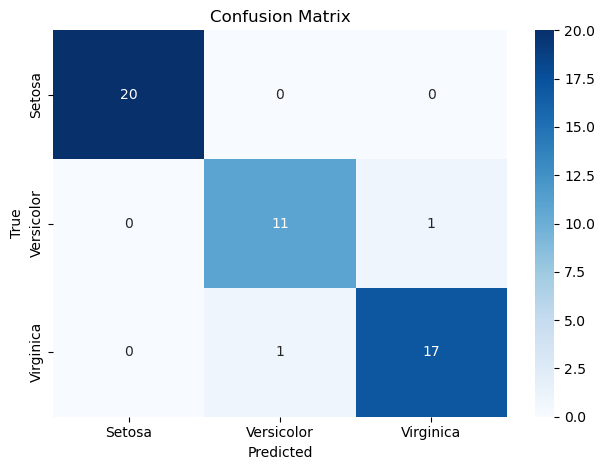

In [22]:
sns.heatmap(cm, annot=True, fmt='', cmap='Blues',xticklabels = ['Setosa','Versicolor','Virginica'],yticklabels = ['Setosa','Versicolor','Virginica'] )

# Add labels, title, and adjust layout
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()

# Display the heatmap
plt.show()

In [23]:
#Classification report of the classifier
report = classification_report(Y_test, prediction)

In [24]:
print(report)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        20
  Versicolor       0.92      0.92      0.92        12
   Virginica       0.94      0.94      0.94        18

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50



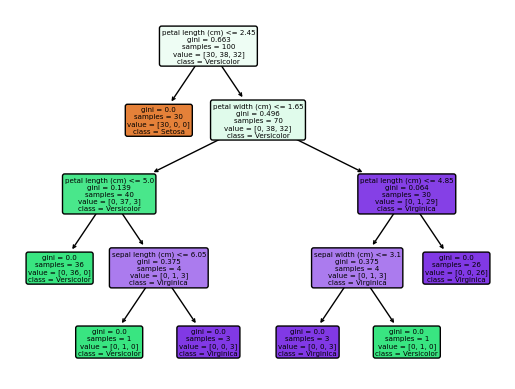

In [27]:
#Drawing the decision tree
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.savefig('Iris Decision tree.png')
plt.show()
